### HRV data preprocessing for FL research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# from PIL import Image

In [2]:
# HRV 데이터셋 불러오기
hrv_df = pd.read_csv('E:/RESEARCH/Datasets/HRV_samsung/HRV_REV_all.csv', sep=',')
hrv_df.head()

,sub,VISIT,disorder,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,E001,4,2,23,1,2,2,1,12,22,...,41.544667,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000
1,E001,5,2,23,1,12,7,0,12,24,...,39.825333,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333
2,E002,1,2,38,1,14,17,14,31,122,...,20.052000,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000
3,E002,2,2,38,1,13,36,16,32,139,...,20.201667,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000
4,E002,3,2,38,1,7,10,11,23,70,...,74.788000,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000


In [3]:
hrv_df.shape

(479, 93)

##### index 범주 만들어줄 항을 생성 및 범주화

In [4]:
hrv_df['IndexH']=0

In [5]:
hrv_df.loc[hrv_df['HAMD']<=6, 'IndexH'] =0
hrv_df.loc[(hrv_df['HAMD']>6) & (hrv_df['HAMA']<=17), 'IndexH'] = 1
hrv_df.loc[(hrv_df['HAMD']>17) & (hrv_df['HAMA']<=25), 'IndexH'] = 2
hrv_df.loc[hrv_df['HAMD']>25, 'IndexH'] = 3

In [6]:
hrv_df.head() #제대로 분류되었는지 확인

,sub,VISIT,disorder,age,gender,HAMD,HAMA,PDSS,ASI,APPQ,...,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP,IndexH
0,E001,4,2,23,1,2,2,1,12,22,...,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000,0
1,E001,5,2,23,1,12,7,0,12,24,...,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333,1
2,E002,1,2,38,1,14,17,14,31,122,...,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000,1
3,E002,2,2,38,1,13,36,16,32,139,...,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000,0
4,E002,3,2,38,1,7,10,11,23,70,...,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000,1


In [7]:
#disorder, sub, Visit, 10개변수 값은 pixel에 넣지 않음. (총 13개 제거)
hrv_drop = hrv_df.drop(['sub','disorder','VISIT','HAMD', 'HAMA','PDSS','ASI','APPQ','PSWQ','SPI','PSS','BIS','SSI','IndexH'], axis=1)
# hrv_drop = hrv_df.drop(['sub','disorder','VISIT','HAMD', 'HAMA','PDSS','ASI','APPQ','PSWQ','SPI','PSS','BIS','SSI'], axis=1)
hrv_drop.head()

,age,gender,b1SDNN,b1NN50,b1PNN50,b1RMSSD,b1VLF,b1LF,b1HF,b1LF/HF,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,23,1,53.113667,14.333333,0.233000,56.151000,100.156000,99.322333,315.010667,0.319333,...,41.544667,190.107000,298.508333,206.862333,1.284000,695.477333,65.707000,14.054333,3.911333,34.998000
1,23,1,45.919000,13.666667,0.210000,46.576000,101.827333,204.858333,235.766333,0.914667,...,39.825333,143.756667,115.695333,202.602667,0.585000,462.054667,69.040000,14.117333,6.255000,35.544333
2,38,1,26.377667,0.000000,0.000000,15.102000,131.038333,88.803333,42.704000,2.854667,...,20.052000,22.006000,50.182000,32.529333,2.499333,104.717000,92.789333,11.013333,0.945667,35.086000
3,38,1,24.147333,0.000000,0.000000,13.519333,132.222000,177.344000,47.517000,4.686333,...,20.201667,55.579000,84.441000,18.754000,5.803000,158.774333,85.980667,12.608333,0.785667,36.141000
4,38,1,79.460333,6.000000,0.066333,87.518667,84.822667,326.738667,303.335333,0.817333,...,74.788000,182.229000,530.565667,546.574000,1.685667,1259.368667,84.368667,14.285667,0.648000,35.879000


In [8]:
# target을 disorder로 놓으면
y = hrv_df.loc[:,['IndexH']]

In [9]:
y

,IndexH
0,0
1,1
2,1
3,0
4,1
...,...
474,0
475,3
476,2
477,1


In [10]:
# 환자만 따로 뽑으면
patient = hrv_df.loc[:, ['sub']]

In [11]:
x = hrv_drop

##### 이제 총 81개의 column으로 구성되었으니까 우선 normalization 하자 (0~1 사이 값으로 범위변환)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hrv_drop[:] = scaler.fit_transform(hrv_drop[:])

In [13]:
hrv_drop.head()

,age,gender,b1SDNN,b1NN50,b1PNN50,b1RMSSD,b1VLF,b1LF,b1HF,b1LF/HF,...,cRMSSD,cVLF,cLF,cHF,cLF/HF,cPOWER,cHR,cRESP,cSC,cTEMP
0,-1.277935,-1.312094,0.222850,1.889593,2.212832,0.192138,-0.087836,-0.103956,-0.067502,-0.679771,...,-0.012434,-0.080355,-0.085651,-0.084088,-0.613387,-0.087092,-0.814325,0.661662,1.449436,0.429974
1,-1.277935,-1.312094,0.083066,1.771122,1.929051,0.060696,-0.087651,-0.095142,-0.083695,-0.484360,...,-0.033415,-0.087077,-0.099528,-0.084722,-0.761271,-0.096138,-0.522467,0.704500,2.752076,0.806835
2,-0.296537,-1.312094,-0.296598,-0.657524,-0.661992,-0.371365,-0.084411,-0.104834,-0.123147,0.152424,...,-0.274717,-0.104731,-0.104501,-0.110031,-0.356265,-0.109984,1.557171,-1.406125,-0.198920,0.490677
3,-0.296537,-1.312094,-0.339931,-0.657524,-0.661992,-0.393091,-0.084280,-0.097440,-0.122163,0.753648,...,-0.272890,-0.099863,-0.101900,-0.112081,0.342676,-0.107890,0.960962,-0.321574,-0.287850,1.218416
4,-0.296537,-1.312094,0.734733,0.408711,0.156448,0.622739,-0.089537,-0.084963,-0.069888,-0.516308,...,0.393247,-0.081498,-0.068036,-0.033533,-0.528408,-0.065241,0.819805,0.818961,-0.364367,1.037688


In [14]:
hrv_drop = hrv_drop.dropna()

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

335
144
335
144


In [35]:
y_train

,IndexH
472,0
231,0
246,1
299,0
471,1
...,...
323,0
192,0
117,0
47,1


In [36]:
hrv_drop.isnull().sum()

age        0
gender     0
b1SDNN     0
b1NN50     0
b1PNN50    0
          ..
cPOWER     0
cHR        0
cRESP      0
cSC        0
cTEMP      0
Length: 80, dtype: int64

### Support Vector Machine Analyzing

In [37]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

In [38]:
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

In [39]:
scores = cross_val_score(svm_clf, x_train, y_train, cv = 5)
scores
pd.DataFrame(cross_validate(svm_clf, x_train, y_train, cv =5))
print('교차검증 평균: ', scores.mean())

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

교차검증 평균:  0.6117133393556158


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
svm_clf =svm.SVC(kernel = 'rbf')
scores = cross_val_score(svm_clf, x_train, y_train, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, x_train, y_train, cv =5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.6265582655826558


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [41]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(x_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

,C,gamma,mean_test_score
26,1.000,0.100,0.660976
33,10.000,0.010,0.658386
56,100.000,0.001,0.641223
48,50.000,0.001,0.638814
0,0.001,0.001,0.636375
...,...,...,...
32,10.000,0.001,0.624059
40,25.000,0.001,0.621620
41,25.000,0.010,0.611804
49,50.000,0.010,0.589732


### Another Trial

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
scores = []
for thisC in [*range(1,100)]:
    svc=SVC(kernel='linear',C=thisC)
    model=svc.fit(x_train,y_train)
    scoreTrain=model.score(x_train,y_train)
    scoreTest=model.score(x_test,y_test)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain, scoreTest))
    scores.append([scoreTrain])

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

선형 SVM : C:1, training score:0.782090, test score:0.611111
선형 SVM : C:2, training score:0.802985, test score:0.604167
선형 SVM : C:3, training score:0.802985, test score:0.569444
선형 SVM : C:4, training score:0.817910, test score:0.569444
선형 SVM : C:5, training score:0.823881, test score:0.576389
선형 SVM : C:6, training score:0.829851, test score:0.576389
선형 SVM : C:7, training score:0.826866, test score:0.583333

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



선형 SVM : C:8, training score:0.832836, test score:0.583333


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:9, training score:0.838806, test score:0.583333
선형 SVM : C:10, training score:0.838806, test score:0.555556


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:11, training score:0.835821, test score:0.548611
선형 SVM : C:12, training score:0.838806, test score:0.548611

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



선형 SVM : C:13, training score:0.838806, test score:0.541667


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:14, training score:0.841791, test score:0.548611
선형 SVM : C:15, training score:0.838806, test score:0.548611


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:16, training score:0.844776, test score:0.541667


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:17, training score:0.844776, test score:0.534722


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:18, training score:0.844776, test score:0.534722


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:19, training score:0.844776, test score:0.534722


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:20, training score:0.844776, test score:0.534722


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:21, training score:0.850746, test score:0.527778


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:22, training score:0.850746, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:23, training score:0.844776, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:24, training score:0.844776, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:25, training score:0.847761, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:26, training score:0.847761, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:27, training score:0.847761, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:28, training score:0.847761, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:29, training score:0.847761, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:30, training score:0.847761, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:31, training score:0.847761, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:32, training score:0.847761, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:33, training score:0.847761, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:34, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:35, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:36, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:37, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:38, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:39, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:40, training score:0.859701, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:41, training score:0.859701, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:42, training score:0.859701, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:43, training score:0.859701, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:44, training score:0.859701, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:45, training score:0.859701, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:46, training score:0.859701, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:47, training score:0.859701, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:48, training score:0.859701, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:49, training score:0.859701, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:50, training score:0.859701, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:51, training score:0.859701, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:52, training score:0.859701, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:53, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:54, training score:0.856716, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:55, training score:0.859701, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:56, training score:0.862687, test score:0.520833


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:57, training score:0.862687, test score:0.520833


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:58, training score:0.862687, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:59, training score:0.862687, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:60, training score:0.862687, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:61, training score:0.862687, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:62, training score:0.862687, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:63, training score:0.865672, test score:0.520833


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:64, training score:0.865672, test score:0.520833


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:65, training score:0.865672, test score:0.520833


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:66, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:67, training score:0.862687, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:68, training score:0.865672, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:69, training score:0.865672, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:70, training score:0.865672, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:71, training score:0.865672, test score:0.500000


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:72, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:73, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:74, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:75, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:76, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:77, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:78, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:79, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:80, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:81, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:82, training score:0.868657, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:83, training score:0.868657, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:84, training score:0.868657, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:85, training score:0.865672, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:86, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:87, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:88, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:89, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:90, training score:0.865672, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:91, training score:0.868657, test score:0.513889


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:92, training score:0.868657, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:93, training score:0.868657, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:94, training score:0.865672, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:95, training score:0.865672, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:96, training score:0.865672, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:97, training score:0.865672, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:98, training score:0.865672, test score:0.506944


c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


선형 SVM : C:99, training score:0.865672, test score:0.506944


<AxesSubplot:xlabel='Number of Epochs', ylabel='Train Accuracy'>

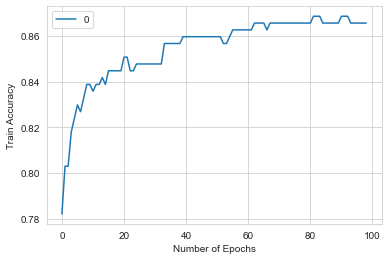

In [53]:
sns.set_style('whitegrid')
pd.DataFrame(scores).plot(ylabel='Train Accuracy', xlabel = 'Number of Epochs')
# scores.set_ylabel('Train Accuracy')
# scores.set_xlabel('Number of Epochs')

#### SVM-RFE (Support Vector Machine -Recursive Feature Elimination)

In [26]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [27]:
estimator = SVR(kernel = "linear")
selector = RFE(estimator, n_features_to_select = 8, step=2)
selector = selector.fit(x_train, y_train)

c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\user\anaconda3\envs\mlprac\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [28]:
print(selector.support_)
print(selector.ranking_)

[False False False False False False False False  True False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False False False False False
  True False  True False False False  True False False False False False
  True False False False False False False False]
[37 16 36 30 28 31 30 25  1 31 16 26  8 24  1 20 11  6 20  3 12  2 21 35
 14 24 32 22 23 18 18 25 26 36 28 37 35  9  8 10  2 15  4  4 13 27 27 32
 29 34 17 19 21  1  1  7  7 33 29  3  1 33  1  5 19 11  1 13 14 15 23  9
  1 12 34 17  6 10 22  5]


In [29]:
selector

RFE(estimator=SVR(kernel='linear'), n_features_to_select=8, step=2)

In [30]:
selector.predict(x_test)

array([-5.91036957e-02,  4.95267887e-01,  1.43135844e-01,  2.47378440e-02,
        1.47774485e-01,  4.46015254e-01,  2.19322728e-01,  1.94304827e-01,
        1.99205050e-01,  1.84433943e-01,  7.10439648e-02,  2.80592431e-01,
        1.33816038e-01, -1.48333701e-01,  1.65698634e-01,  6.14249275e-01,
        3.82579806e-01, -2.59191238e-02,  1.77753557e-01, -3.76784093e+00,
        3.88792573e-01,  5.73015894e-02,  2.84149183e-01,  2.84149793e-01,
        3.01015981e-01,  6.89448367e-02,  2.40947892e-01,  4.23085819e+00,
        6.64033100e-01,  1.69995683e-01,  8.38022913e-02, -7.33131731e-02,
        1.40763146e-01,  4.29825717e-01,  2.56931378e-01,  5.96487962e-02,
        8.50729970e-02,  1.49636950e-01,  8.85612340e-02, -6.59835045e-03,
        9.17985770e-02,  1.13767253e-01,  1.03052409e-01,  2.95056550e-01,
        7.79759954e-02, -4.94746906e-02,  4.27096651e-02,  1.45812031e-01,
        1.80033743e-01,  2.48998623e-01,  3.22984052e-01,  8.10428584e-01,
        1.02205829e-01, -

In [31]:
selector.score(x_test,y_test)

-0.5733951829318491

In [32]:
#값이 어떻게 표기되는지 x0를 통해서 확인해보자
x0=hrv_81.loc[479].values

NameError: name 'hrv_81' is not defined

In [ ]:
x0

In [ ]:
# 9 x 9으로 reshape
x0=x0.reshape(9,9)

In [ ]:
# heatmap으로 체크해봄. 근데 heatmap보다 그냥 plt.imsho()써서 gray scale로 보는게 가독성 있을듯
# x0 = sns.heatmap(x0)

In [ ]:
#gray scale로 확인해보고
plt.imshow(x0, cmap='gray')

In [ ]:
hrv_81.loc[0] #확인했으니까 이제 우리 데이터를 가지고

In [ ]:
hrv_81.shape

In [ ]:
hrv_81_arr = hrv_81.values
hrv_81_arr.shape

In [ ]:
# array 형태로 480개 행에 대해서 9 x 9 reshape
hrv_array = hrv_81_arr.reshape(480,9,9)

In [ ]:
hrv_array.shape

In [ ]:
# data = pd.concat([hrv_100,hrv_target], axis=1)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/y.npy', y)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y1.npy', y1)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y2.npy', y2)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y3.npy', y3)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y4.npy', y4)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y5.npy', y5)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y6.npy', y6)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y7.npy', y7)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y8.npy', y8)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y9.npy', y9)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/pracdata/y10.npy', y10)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/x.npy', hrv_array)

In [ ]:
# np.save('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/patient.npy', patient)

In [ ]:
# 확인해보자
# xdata = np.load('E:/RESEARCH/Datasets/HRV_samsung/cat_hamd/x.npy')

In [ ]:
# xdata

In [ ]:
# xdata[0].shape